In [58]:
import pandas as pd
import numpy as np
# Load the Dataset
df=pd.read_csv("Titanic-Dataset.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [59]:
# Finding Duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [60]:
# Check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
# Categorical Columns
Categorical_Column = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical Columns : ", Categorical_Column)

# Numerical Columns

#Numerical_Column = [col for col in df.columns if df[col].dtype == "int" or "float"]

Numerical_Column = [col for col in df.columns if df[col].dtype != "object"]
print("\nNumerical Columns : ", Numerical_Column)

Categorical Columns :  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Numerical Columns :  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [62]:
# Check the total number of Unique Values in the Categorical Columns
df[Categorical_Column].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [63]:
df["Ticket"].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [64]:
df1=df.drop(columns = ["Name","Ticket"])
df1.shape

(891, 10)

In [65]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
round(df1.isnull().sum()/df1.shape[0]*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [67]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(889, 9)

In [68]:
# Mean imputation
df3=df2.fillna(df2.Age.mean())
# let's check the null values again
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

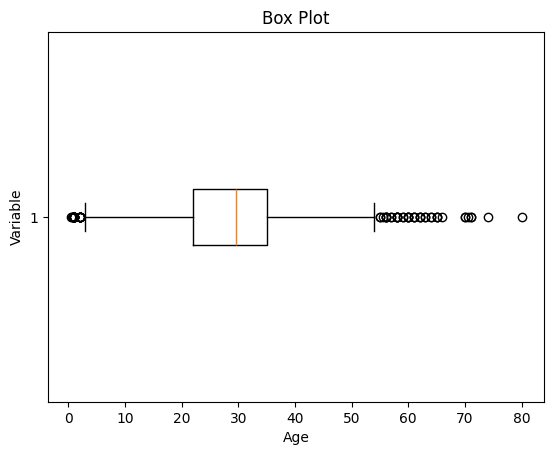

In [69]:
import matplotlib.pyplot as plt
plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [70]:
# Calculate summary statistics
mean = df3['Age'].mean()
std = df3['Age'].std()
# calculate the lower and upper bounds 
lower_bound = mean - std*2
upper_bound = mean + std*2
print('Lower Bound: ',round(lower_bound,2))
print('upper Bound: ',round(upper_bound,2))
# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] >= upper_bound)]

Lower Bound:  3.71
upper Bound:  55.58


In [71]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

In [72]:
import sklearn

In [73]:
from sklearn.preprocessing import MinMaxScaler

# initializing the MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

# Numerical Columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X.copy()
# Learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


In [74]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']

# Create a copy of X to avoid overwriting the original data
x1 = X.copy()

# Apply Z-score scaling to the numerical columns
x1[num_col_] = scaler.fit_transform(x1[num_col_])

# Display the transformed data
x1.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.825209,male,-0.589620,0.431350,-0.474326,-0.500240,S
1,-1.572211,female,0.644848,0.431350,-0.474326,0.788947,C
2,0.825209,female,-0.281003,-0.475199,-0.474326,-0.486650,S
3,-1.572211,female,0.413385,0.431350,-0.474326,0.422861,S
4,0.825209,male,0.413385,-0.475199,-0.474326,-0.484133,S


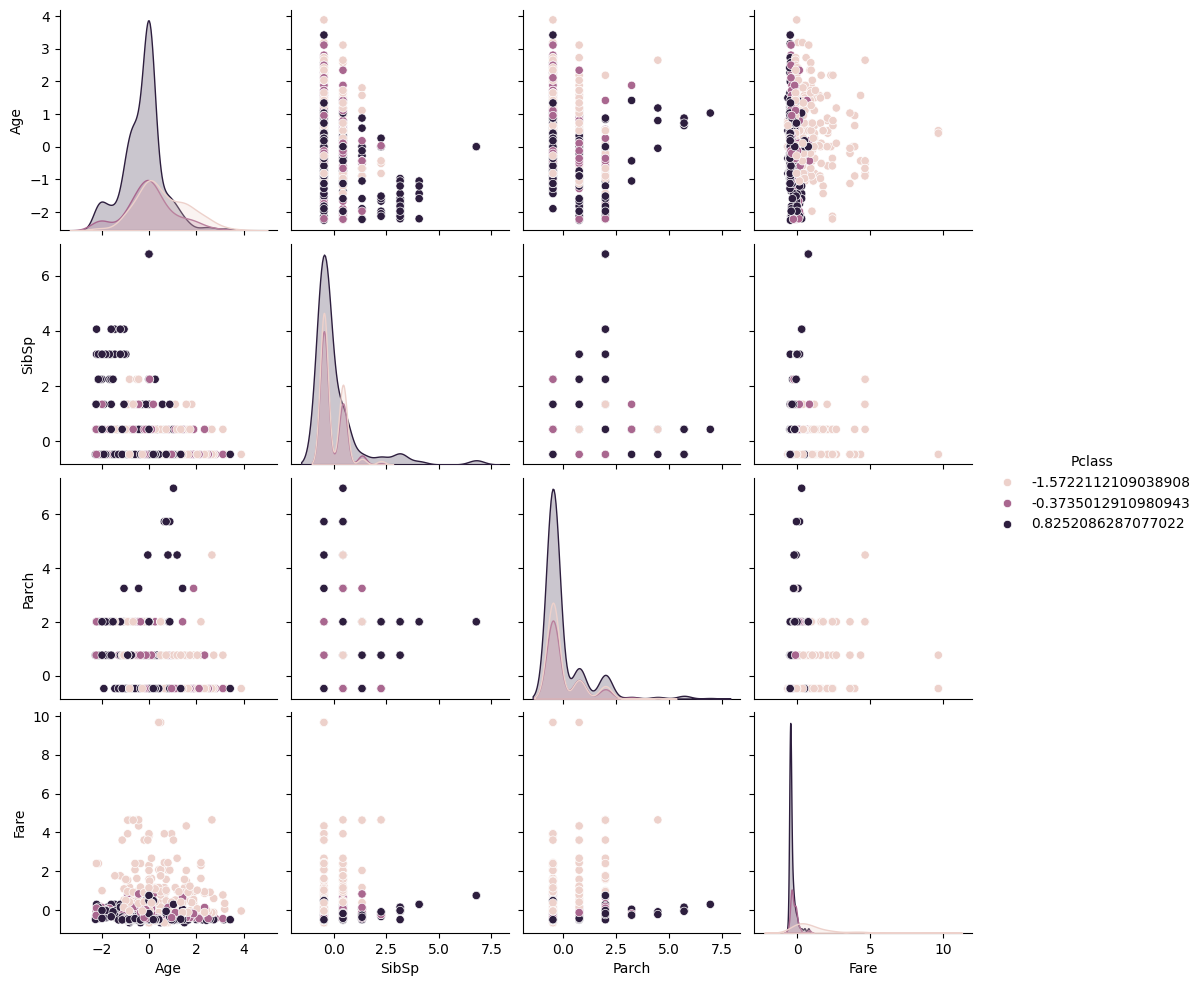

In [75]:
import seaborn as sns
sns.pairplot(x1.select_dtypes(['number']),hue='Pclass')

In [76]:
# Encode Categorical Variables
# ----------------------------
from sklearn.preprocessing import LabelEncoder

x1['Sex'] = LabelEncoder().fit_transform(x1['Sex'])
x1['Embarked'] = LabelEncoder().fit_transform(x1['Embarked'])

In [77]:
# Split the Dataset into Train and Test Sets
# ----------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x1, Y, test_size=0.2, random_state=42)


In [78]:
# Train Machine Learning Models
# ----------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Example: Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [79]:
# Evaluate the Model
# ----------------------------
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[85 24]
 [17 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81       109
           1       0.68      0.75      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178


Accuracy Score: 0.7696629213483146


In [80]:
# (Optional) Cross Validation
# ----------------------------
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x1, Y, cv=5)
print("\nCross-Validation Accuracy (5-fold):", scores.mean())



Cross-Validation Accuracy (5-fold): 0.8088046721259442


<Axes: title={'center': 'Feature Importance'}>

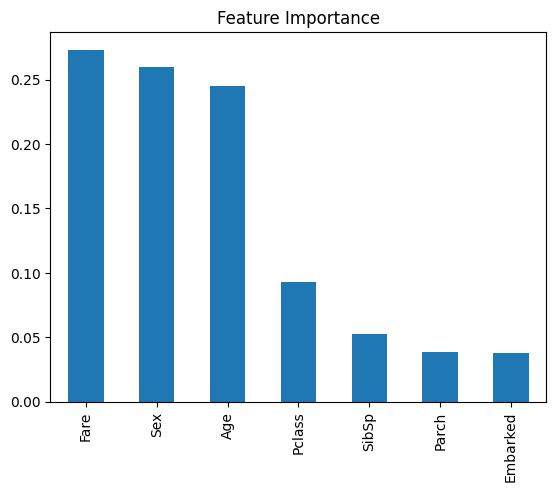

In [81]:
# Feature Importance (for Tree-Based Models)
# ----------------------------
feature_importance = pd.Series(model.feature_importances_, index=x1.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')

# ----------------------------
# @ Summary and Conclusion (Write-up Section)
# ----------------------------
# - Discuss which features were most predictive (based on importance)
# - Mention best model and its accuracy
# - Add any limitations or future improvements